# Análise Descritiva do Dataset Original (NIH Chest X-ray Dataset)

Este notebook carrega o arquivo CSV original `Data_Entry_2017.csv` e apresenta estatísticas descritivas e visualizações para entender a distribuição dos dados brutos, como rótulos de achados, posições de visualização, idade e gênero dos pacientes.

In [31]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')

In [33]:
ARCHIVE_PATH = 'archive/'
DATA_ENTRY_FILENAME = 'Data_Entry_2017.csv'
DATA_ENTRY_FILEPATH = os.path.join(ARCHIVE_PATH, DATA_ENTRY_FILENAME)

print(f"Caminho do arquivo de dados original: {DATA_ENTRY_FILEPATH}")

Caminho do arquivo de dados original: archive/Data_Entry_2017.csv


In [34]:
print(f"Carregando dados de '{DATA_ENTRY_FILEPATH}'...")

try:
    original_df = pd.read_csv(DATA_ENTRY_FILEPATH, low_memory=False)
    print("Dataset carregado com sucesso!")
    print(f"Número total de entradas: {len(original_df)}")
    print("\nPrimeiras 5 linhas do dataset:")
    print(original_df.head())

except FileNotFoundError:
    print(f"Erro: O arquivo '{DATA_ENTRY_FILEPATH}' não foi encontrado.")
    print("Por favor, verifique se o arquivo 'Data_Entry_2017.csv' está dentro da pasta 'archive'.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

if 'original_df' not in locals():
    original_df = None

Carregando dados de 'archive/Data_Entry_2017.csv'...
Dataset carregado com sucesso!
Número total de entradas: 112120

Primeiras 5 linhas do dataset:
        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F    

In [35]:
if original_df is not None:
    print("\nInformações gerais do DataFrame original:")
    original_df.info()

    print("\nEstatísticas descritivas para colunas numéricas:")
    print(original_df[['Follow-up #', 'Patient Age', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']].describe())
else:
    print("Não foi possível carregar o DataFrame. Pulando análises.")


Informações gerais do DataFrame original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), 

## Análise da Coluna 'Finding Labels'


Análise da coluna 'Finding Labels':
Contagem de ocorrências de cada achado ou condição:
Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


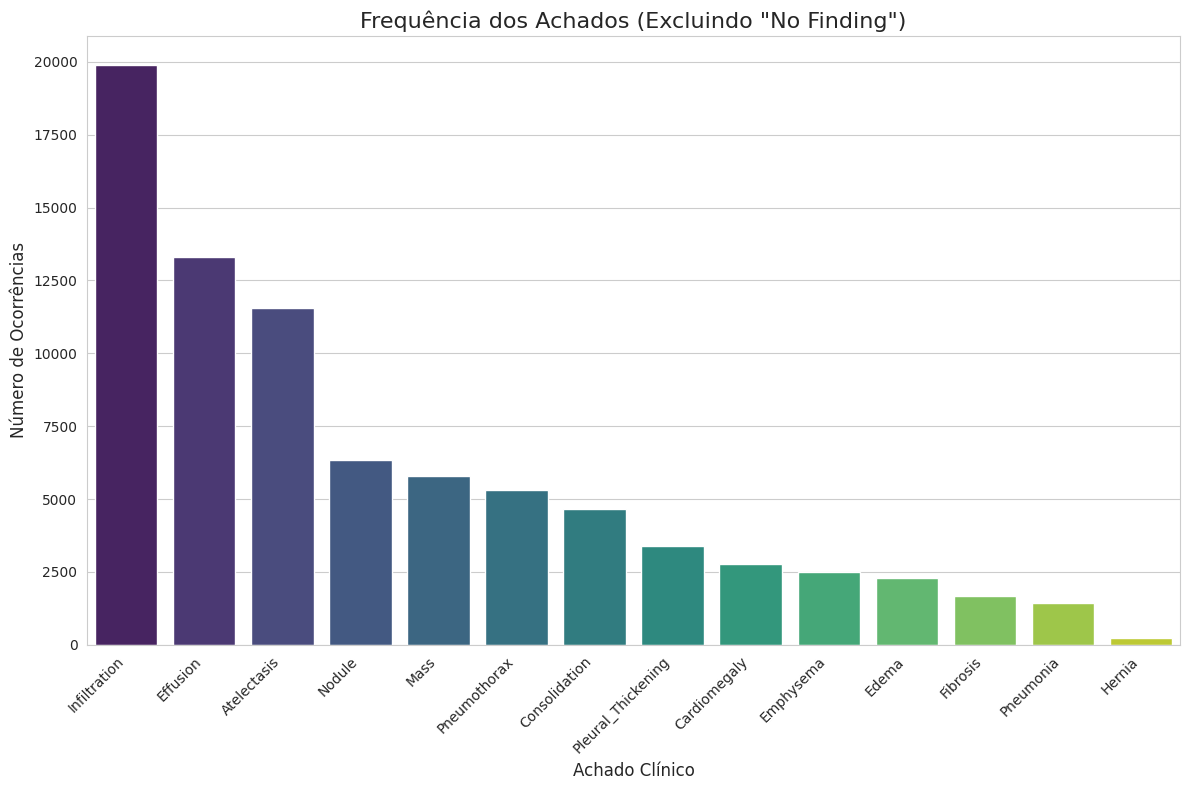

In [36]:
if original_df is not None:
    print("\nAnálise da coluna 'Finding Labels':")

    all_labels = original_df['Finding Labels'].str.split('|').explode()

    label_counts = all_labels.value_counts()

    print("Contagem de ocorrências de cada achado ou condição:")
    print(label_counts)

    label_counts_excluding_nofinding = label_counts.drop('No Finding', errors='ignore')

    plt.figure(figsize=(12, 8))
    sns.barplot(x=label_counts_excluding_nofinding.index,
                y=label_counts_excluding_nofinding.values,
                hue=label_counts_excluding_nofinding.index, 
                palette='viridis',
                legend=False) 

    plt.title('Frequência dos Achados (Excluindo "No Finding")', fontsize=16)
    plt.xlabel('Achado Clínico', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Não foi possível carregar o DataFrame. Pulando análise de 'Finding Labels'.")

## Análise das Colunas 'View Position' e 'Patient Gender'


Análise da coluna 'View Position':
Contagem de ocorrências para cada posição de visualização:
View Position
PA    67310
AP    44810
Name: count, dtype: int64


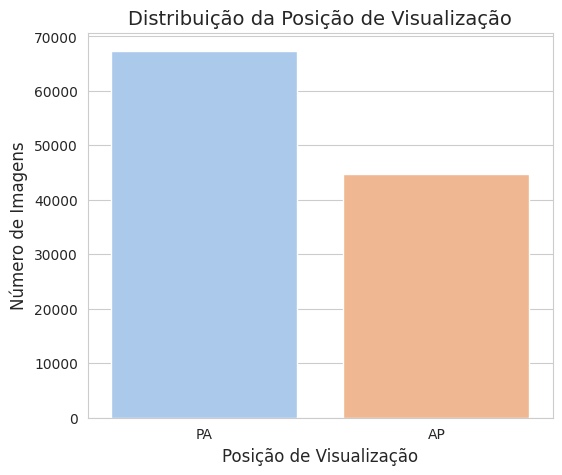


Análise da coluna 'Patient Gender':
Contagem de ocorrências para cada gênero:
Patient Gender
M    63340
F    48780
Name: count, dtype: int64


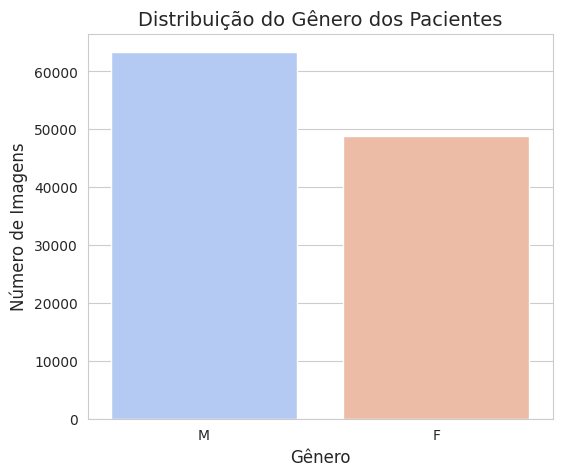

In [37]:
if original_df is not None:
    print("\nAnálise da coluna 'View Position':")
    position_counts = original_df['View Position'].value_counts()
    print("Contagem de ocorrências para cada posição de visualização:")
    print(position_counts)

    plt.figure(figsize=(6, 5))
    sns.countplot(data=original_df, x='View Position', hue='View Position', palette='pastel', legend=False)
    plt.title('Distribuição da Posição de Visualização', fontsize=14)
    plt.xlabel('Posição de Visualização', fontsize=12)
    plt.ylabel('Número de Imagens', fontsize=12)
    plt.show()

    print("\nAnálise da coluna 'Patient Gender':")
    gender_counts = original_df['Patient Gender'].value_counts()
    print("Contagem de ocorrências para cada gênero:")
    print(gender_counts)

    plt.figure(figsize=(6, 5))
    sns.countplot(data=original_df, x='Patient Gender', hue='Patient Gender', palette='coolwarm', legend=False)
    plt.title('Distribuição do Gênero dos Pacientes', fontsize=14)
    plt.xlabel('Gênero', fontsize=12)
    plt.ylabel('Número de Imagens', fontsize=12)
    plt.show()
else:
    print("Não foi possível carregar o DataFrame. Pulando análise de 'View Position' e 'Patient Gender'.")

## Análise da Coluna 'Patient Age'


Análise da coluna 'Patient Age':
Estatísticas descritivas para Idade dos Pacientes:
count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64


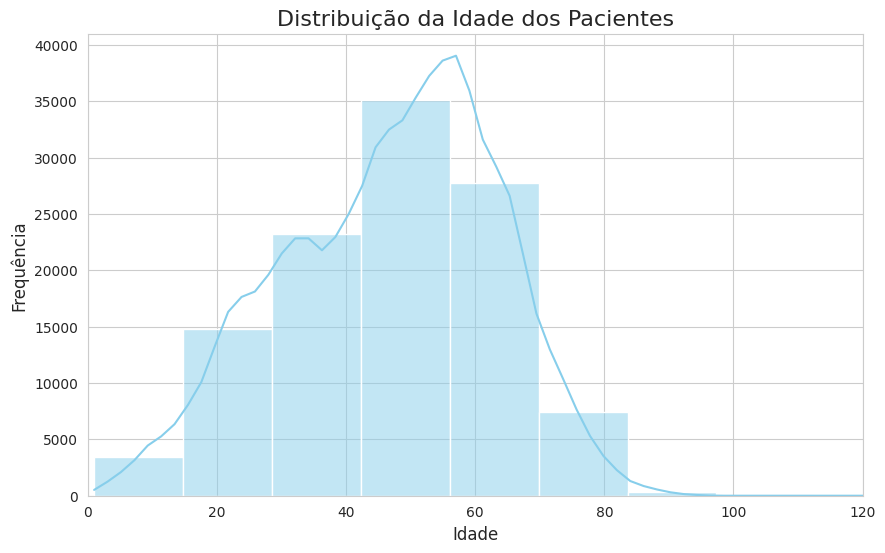

In [38]:
if original_df is not None:
    print("\nAnálise da coluna 'Patient Age':")

    original_df['Patient Age'] = pd.to_numeric(original_df['Patient Age'], errors='coerce')

    print("Estatísticas descritivas para Idade dos Pacientes:")
    print(original_df['Patient Age'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(data=original_df, x='Patient Age', bins=30, kde=True, color='skyblue')

    plt.xlim(original_df['Patient Age'].min() - 5 if original_df['Patient Age'].min() is not None else 0, original_df['Patient Age'].max() + 5 if original_df['Patient Age'].max() is not None else 100)
    if original_df['Patient Age'].max() is not None and original_df['Patient Age'].max() > 120: # Caso haja idades muito altas, pode limitar visualmente
        plt.xlim(0, 120)

    plt.title('Distribuição da Idade dos Pacientes', fontsize=16)
    plt.xlabel('Idade', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.show()
else:
    print("Não foi possível carregar o DataFrame. Pulando análise de 'Patient Age'.")

## Contagem de Imagens Únicas e Pacientes Únicos

In [39]:
if original_df is not None:
    num_total_entries = len(original_df)
    num_unique_images = original_df['Image Index'].nunique()
    num_unique_patients = original_df['Patient ID'].nunique()

    print("\nContagem de Imagens Únicas e Pacientes Únicos:")
    print(f"Número total de entradas no CSV: {num_total_entries}")
    print(f"Número de nomes de arquivos de imagem únicos: {num_unique_images}")
    print(f"Número de IDs de pacientes únicos: {num_unique_patients}")
else:
    print("Não foi possível carregar o DataFrame. Pulando contagem de únicos.")


Contagem de Imagens Únicas e Pacientes Únicos:
Número total de entradas no CSV: 112120
Número de nomes de arquivos de imagem únicos: 112120
Número de IDs de pacientes únicos: 30805


## Análise de Correlação entre Atributos

Esta seção explora possíveis correlações ou relacionamentos entre diferentes atributos do dataset, como idade, gênero, posição de visualização e os achados clínicos.


--- Análise de Correlação ---

1. Correlação entre variáveis numéricas (Pearson):
                             Follow-up #  Patient Age  OriginalImage[Width  \
Follow-up #                     1.000000    -0.028684             0.039551   
Patient Age                    -0.028684     1.000000             0.087670   
OriginalImage[Width             0.039551     0.087670             1.000000   
Height]                        -0.127636     0.016914             0.587006   
OriginalImagePixelSpacing[x     0.017533     0.002522            -0.832195   
y]                              0.017533     0.002522            -0.832195   

                              Height]  OriginalImagePixelSpacing[x        y]  
Follow-up #                 -0.127636                     0.017533  0.017533  
Patient Age                  0.016914                     0.002522  0.002522  
OriginalImage[Width          0.587006                    -0.832195 -0.832195  
Height]                      1.000000                 

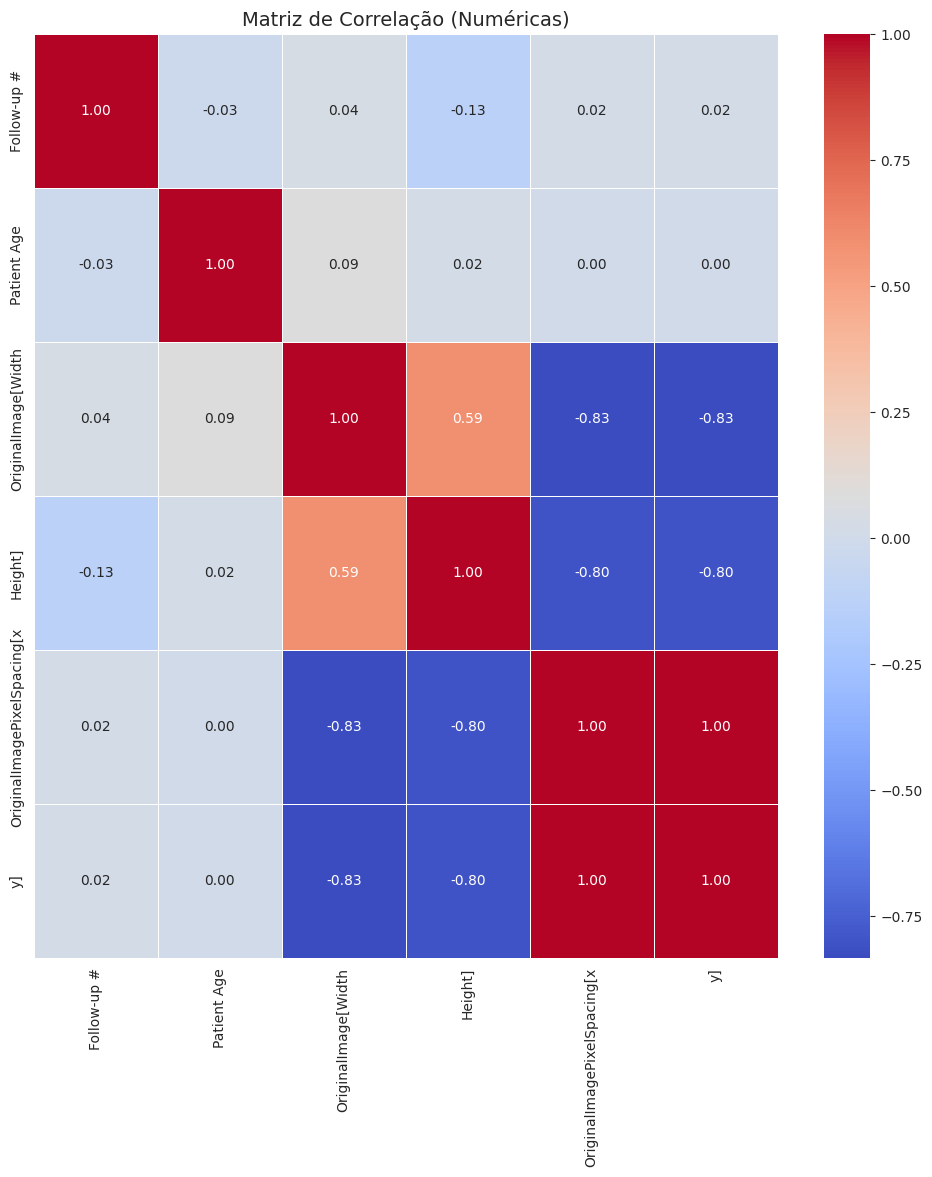


2. Relação entre Idade do Paciente e Gênero/Posição de Visualização:


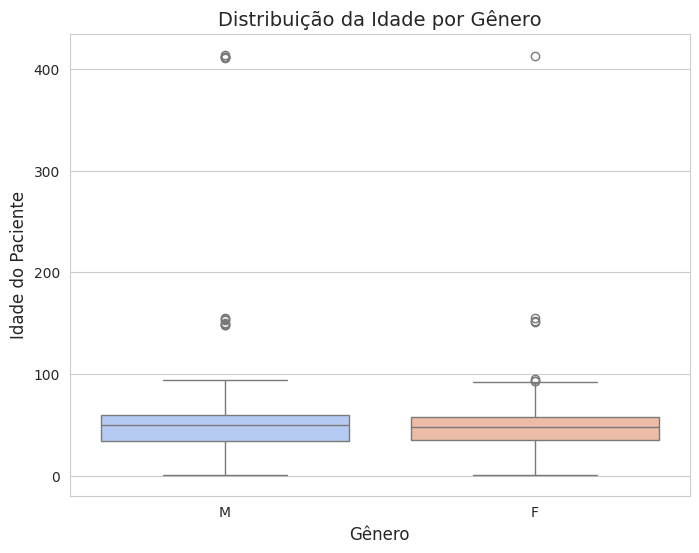

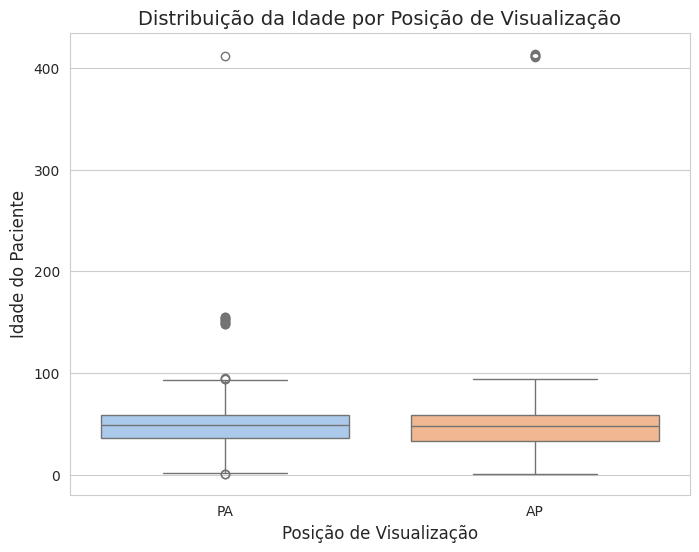

Observação: Boxplots mostram a mediana, quartis e possíveis outliers na idade para cada categoria.

3. Relação entre Gênero e Posição de Visualização:
Contagem cruzada (Gênero vs Posição):
View Position      AP     PA
Patient Gender              
F               18613  30167
M               26197  37143


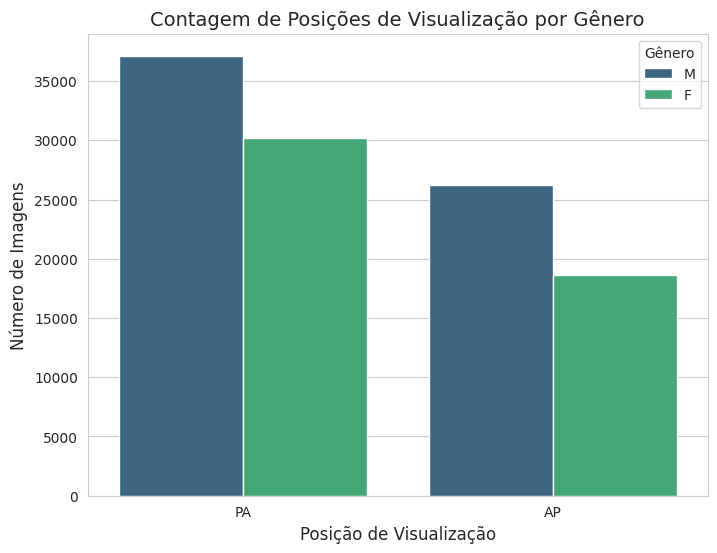

Observação: A tabela e o gráfico mostram a distribuição combinada de gênero e posição. Isso pode indicar se um gênero é mais propenso a ter um certo tipo de radiografia.

4. Relação entre Achados Comuns e Idade/Gênero:

Idade média por Achado Clínico (para achados comuns):
Finding Labels List
Hernia                63.211454
Fibrosis              52.706999
Pleural_Thickening    50.527917
Atelectasis           50.495458
Emphysema             50.324324
Effusion              49.771195
Nodule                49.476228
Mass                  48.816327
Cardiomegaly          47.268012
Consolidation         46.654810
Pneumothorax          46.486420
Infiltration          46.200814
Edema                 45.578810
Pneumonia             44.927324
Name: Patient Age, dtype: float64


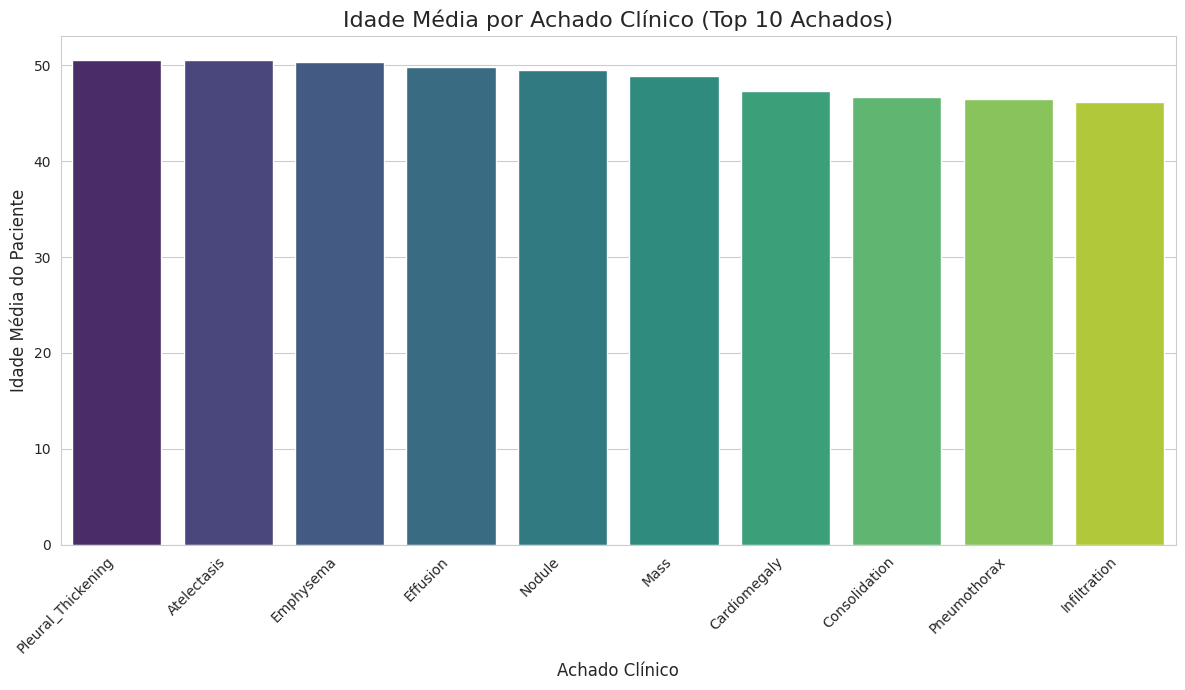


Distribuição de Gênero por Achado Clínico (para achados comuns):
Patient Gender              F         M
Finding Labels List                    
Atelectasis          0.402543  0.597457
Cardiomegaly         0.529179  0.470821
Consolidation        0.428755  0.571245
Effusion             0.441691  0.558309
Emphysema            0.360095  0.639905
Infiltration         0.425606  0.574394
Mass                 0.389658  0.610342
Nodule               0.417943  0.582057
Pleural_Thickening   0.396750  0.603250
Pneumothorax         0.487552  0.512448


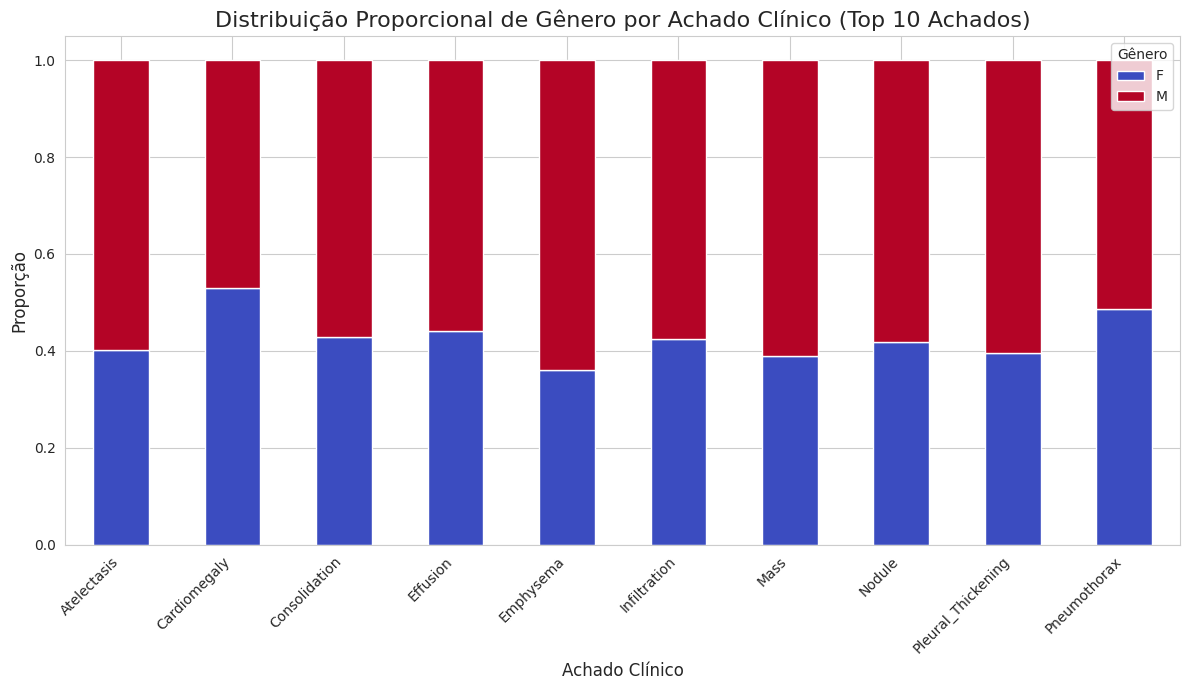

In [40]:
if original_df is not None:
    print("\n--- Análise de Correlação ---")

    print("\n1. Correlação entre variáveis numéricas (Pearson):")
    numerical_cols_to_check = ['Follow-up #', 'Patient Age', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']
    numerical_cols = [col for col in numerical_cols_to_check if col in original_df.columns]

    if 'Patient Age' in original_df.columns:
        original_df['Patient Age'] = pd.to_numeric(original_df['Patient Age'], errors='coerce')

    if numerical_cols:
        correlation_matrix = original_df[numerical_cols].dropna().corr()
        print(correlation_matrix)

        plt.figure(figsize=(len(numerical_cols)*2, len(numerical_cols)*2))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Matriz de Correlação (Numéricas)', fontsize=14)
        plt.show()

    else:
        print("Não há colunas numéricas adequadas para calcular a correlação na matriz.")


    print("\n2. Relação entre Idade do Paciente e Gênero/Posição de Visualização:")

    if 'Patient Gender' in original_df.columns and 'Patient Age' in original_df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=original_df, x='Patient Gender', y='Patient Age', palette='coolwarm', hue='Patient Gender', legend=False)
        plt.title('Distribuição da Idade por Gênero', fontsize=14)
        plt.xlabel('Gênero', fontsize=12)
        plt.ylabel('Idade do Paciente', fontsize=12)
        plt.show()
    else:
        print("Colunas 'Patient Gender' ou 'Patient Age' não encontradas para plotar Boxplot por Gênero.")

    
    if 'View Position' in original_df.columns and 'Patient Age' in original_df.columns:
        plt.figure(figsize=(8, 6))
        
        sns.boxplot(data=original_df, x='View Position', y='Patient Age', palette='pastel', hue='View Position', legend=False)
        plt.title('Distribuição da Idade por Posição de Visualização', fontsize=14)
        plt.xlabel('Posição de Visualização', fontsize=12)
        plt.ylabel('Idade do Paciente', fontsize=12)
        plt.show()
    else:
         print("Colunas 'View Position' ou 'Patient Age' não encontradas para plotar Boxplot por Posição.")

    print("Observação: Boxplots mostram a mediana, quartis e possíveis outliers na idade para cada categoria.")

    
    print("\n3. Relação entre Gênero e Posição de Visualização:")

    if 'Patient Gender' in original_df.columns and 'View Position' in original_df.columns:
        
        gender_position_crosstab = pd.crosstab(original_df['Patient Gender'], original_df['View Position'])
        print("Contagem cruzada (Gênero vs Posição):")
        print(gender_position_crosstab)
        
        plt.figure(figsize=(8, 6))
        sns.countplot(data=original_df, x='View Position', hue='Patient Gender', palette='viridis')
        plt.title('Contagem de Posições de Visualização por Gênero', fontsize=14)
        plt.xlabel('Posição de Visualização', fontsize=12)
        plt.ylabel('Número de Imagens', fontsize=12)
        plt.legend(title='Gênero')
        plt.show()

        print("Observação: A tabela e o gráfico mostram a distribuição combinada de gênero e posição. Isso pode indicar se um gênero é mais propenso a ter um certo tipo de radiografia.")
    else:
        print("Colunas 'Patient Gender' ou 'View Position' não encontradas para análise de contagem cruzada.")

    
    print("\n4. Relação entre Achados Comuns e Idade/Gênero:")

    if 'Finding Labels' in original_df.columns and 'Patient Age' in original_df.columns and 'Patient Gender' in original_df.columns:
        
        original_df['Finding Labels List'] = original_df['Finding Labels'].str.split('|')
        
        exploded_df = original_df.explode('Finding Labels List')
        
        exploded_df = exploded_df[exploded_df['Finding Labels List'] != 'No Finding']
        
        exploded_df['Patient Age'] = pd.to_numeric(exploded_df['Patient Age'], errors='coerce')
        
        average_age_per_finding = exploded_df.groupby('Finding Labels List')['Patient Age'].mean().sort_values(ascending=False)
        print("\nIdade média por Achado Clínico (para achados comuns):")
        print(average_age_per_finding)
        
        all_labels_check = original_df['Finding Labels'].str.split('|').explode()
        label_counts_check = all_labels_check.value_counts()
        label_counts_excluding_nofinding_check = label_counts_check.drop('No Finding', errors='ignore')
        common_findings = label_counts_excluding_nofinding_check.head(10).index

        average_age_per_common_finding = average_age_per_finding.loc[average_age_per_finding.index.intersection(common_findings)]

        if not average_age_per_common_finding.empty:
            plt.figure(figsize=(12, 7))
            
            sns.barplot(x=average_age_per_common_finding.index, y=average_age_per_common_finding.values, palette='viridis', hue=average_age_per_common_finding.index, legend=False)
            plt.title('Idade Média por Achado Clínico (Top 10 Achados)', fontsize=16)
            plt.xlabel('Achado Clínico', fontsize=12)
            plt.ylabel('Idade Média do Paciente', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
             print("Não há dados de idade disponíveis para os achados comuns selecionados ou as colunas 'Finding Labels' ou 'Patient Age' não existem.")

        
        print("\nDistribuição de Gênero por Achado Clínico (para achados comuns):")

        
        exploded_common_findings_df = exploded_df[exploded_df['Finding Labels List'].isin(common_findings)].copy()

        if not exploded_common_findings_df.empty:

            gender_distribution_per_finding = pd.crosstab(exploded_common_findings_df['Finding Labels List'], exploded_common_findings_df['Patient Gender'], normalize='index')
            print(gender_distribution_per_finding)
            
            gender_distribution_per_finding.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm')
            plt.title('Distribuição Proporcional de Gênero por Achado Clínico (Top 10 Achados)', fontsize=16)
            plt.xlabel('Achado Clínico', fontsize=12)
            plt.ylabel('Proporção', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.legend(title='Gênero')
            plt.tight_layout()
            plt.show()
        else:
            print("Não há dados de gênero disponíveis para os achados comuns selecionados.")

    else:
         print("Colunas 'Finding Labels', 'Patient Age' ou 'Patient Gender' não encontradas para análise de achados vs idade/gênero.")

else:
    print("Não foi possível carregar o DataFrame. Pulando análise de correlação.")